# Final Project - Superivsed Machine Learning Multiple Classification

### Project Description:

This is the final project for Nod Coding Bootcamp. The goal of the project is to predict what skin disease a person has based on visual inspection of the skin (12 questions) or another 22 skin attributes from skin samples (microscopic evaluation). The model diagnoses you with one out of 6 skin diseases based on your input. The model is trained on a data of 366 patients which all had one of these skin diseases.

The model is deployed to a web application using gradio, where after the model gives you diagnosis, ChatGPT gives a summary of the diagnosis, advice on how to treat it and how it could evolve through your life. 

Table of Contents:

0) Data Description
1) Importing Libraries & Data (+Cleaning) [ADD YOUR OPENAI API KEY HERE]
2) Exploratory Data Analysis (EDA)
3) Classification Machine Learning with Many Models
4) Final Evaluations of Simple and Full Model
5) Gradio Application + ChatGPT

### Data Description 
https://www.kaggle.com/code/jayrdixit/dermatology-dataset/input
https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification/data 

The differential diagnosis of "erythemato-squamous" diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with minimal differences. The disorders in this group are psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris. Usually, a biopsy is necessary for the diagnosis, but unfortunately, these diseases share many histopathological features as well.

Patients were first evaluated clinically with 12 features. Afterward, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope

Feature Value Information
- In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient.

- Every other feature clinical and histopathological was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. 


Psoriasis:

- Psoriasis is a chronic autoimmune skin condition characterized by the rapid growth of skin cells, leading to the formation of thick, silvery-white scales and red patches.
Visual Diagnosis: Psoriasis often presents as raised, well-defined, scaly plaques with a reddish or pinkish base. The scales are typically silvery and can appear anywhere on the body but are commonly found on the elbows, knees, scalp, and lower back.

Seborrheic Dermatitis:

- Seborrheic dermatitis is a common skin condition that causes redness, itching, and greasy, yellow or white scales on the scalp, face, and other oily areas of the body.
Visual Diagnosis: It often manifests as red, inflamed skin with oily or flaky scales, particularly in areas with high sebum production, such as the scalp (dandruff), eyebrows, sides of the nose, and behind the ears.

Lichen Planus:

- Lichen planus is an inflammatory skin condition that can affect the skin, mucous membranes, and nails. It presents as flat-topped, shiny, and itchy papules (bumps) that can be reddish-purple.
Visual Diagnosis: The characteristic appearance includes polygonal, purplish bumps with fine white lines or streaks on the surface. It often affects the wrists, ankles, and oral mucosa.

Pityriasis Rosea:

- Pityriasis rosea is a self-limiting skin condition characterized by the development of a single, larger "herald patch" followed by smaller, oval, pink or salmon-colored patches.
Visual Diagnosis: The herald patch is usually round or oval with a fine scale, and the smaller patches often form a Christmas tree-like pattern on the trunk.

Chronic Dermatitis:

- Chronic dermatitis refers to persistent inflammation of the skin that can be caused by various factors, including allergies, irritants, or underlying medical conditions.
Visual Diagnosis: The appearance of chronic dermatitis varies depending on the cause but generally includes redness, itching, dryness, and sometimes oozing or crusting of the affected area.

Pityriasis Rubra Pilaris:

- Pityriasis rubra pilaris is a rare skin disorder characterized by reddish-orange scaly plaques and keratotic follicular papules (bumps).
Visual Diagnosis: It often presents with well-demarcated red-orange plaques covered with fine scales. The palms and soles may become thickened, and there can be areas of islands of sparing.

### 1) Importing Libraries & Data (+Cleaning)

In [29]:
#pip install gradio (do this if needed)

In [30]:
# Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import plot_tree
from joblib import dump
from joblib import load
import joblib

# Import Gradio for App Building
import gradio as gr

# Import Open-AI API
import openai

# Import io
import io

In [31]:
# Input your OPENAI Key 
openai.api_key = [ADD YOUR OPEN AI KEY HERE]

In [32]:
# Import Data:
df = pd.read_csv("dermatology_database_1.csv")

In [33]:
df.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


### 2) Exploratory Data Analysis

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [35]:
df.age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [36]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [37]:
# List of column names for clinical attributes
clinical_columns = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'age', 'class'
]

# List of column names for histopathological attributes
histopathological_columns = [
    'class',
    'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate',
    'fibrosis_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis',
    'parakeratosis', 'clubbing_rete_ridges', 'elongation_rete_ridges',
    'thinning_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess',
    'focal_hypergranulosis', 'disappearance_granular_layer',
    'vacuolisation_damage_basal_layer', 'spongiosis', 'saw_tooth_appearance_retes',
    'follicular_horn_plug', 'perifollicular_parakeratosis',
    'inflammatory_mononuclear_infiltrate', 'band_like_infiltrate'
]

# Create DataFrames for clinical and histopathological attributes
df_c = df[clinical_columns].copy()
df_h = df[histopathological_columns].copy()

In [38]:
# Add "_c" suffix to column names in df_c
for column in df_c.columns:
    if column != 'class':
        df_c.rename(columns={column: column + "_c"}, inplace=True)

# Add "_h" suffix to column names in df_h
for column in df_h.columns:
    if column != 'class':
        df_h.rename(columns={column: column + "_h"}, inplace=True)

In [39]:
# Add specific suffix to whole dataframe
for column in df.columns:
    if column != 'class':
        if column in clinical_columns:
            df.rename(columns={column: column + "_c"}, inplace=True)
        elif column in histopathological_columns:
            df.rename(columns={column: column + "_h"}, inplace=True)

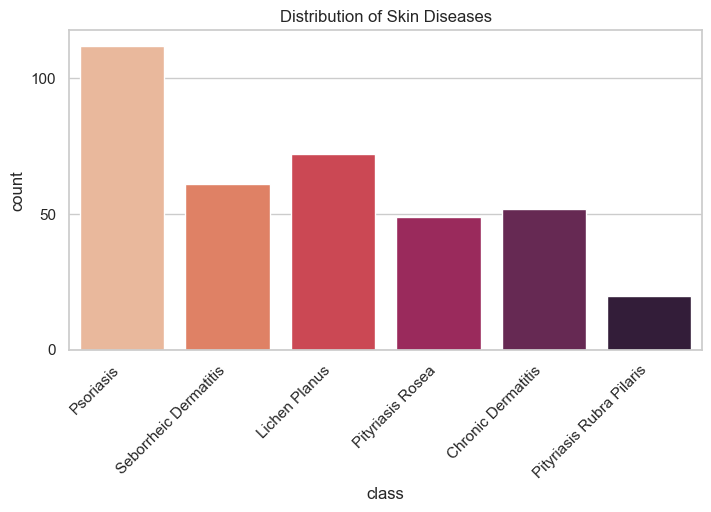

In [103]:
# Create countplot to see frequency of each disease
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="class", palette="rocket_r")

# List of diseases
custom_labels = [
    "Psoriasis",
    "Seborrheic Dermatitis",
    "Lichen Planus",
    "Pityriasis Rosea",
    "Chronic Dermatitis",
    "Pityriasis Rubra Pilaris"
]

ax.set_xticklabels(custom_labels, rotation=45, horizontalalignment='right')
plt.title("Distribution of Skin Diseases")
sns.set(font_scale=3)
plt.tight_layout()
plt.show()

In [41]:
df.describe()

,erythema_c,scaling_c,definite_borders_c,itching_c,koebner_phenomenon_c,polygonal_papules_c,follicular_papules_c,oral_mucosal_involvement_c,knee_and_elbow_involvement_c,scalp_involvement_c,...,disappearance_granular_layer_h,vacuolisation_damage_basal_layer_h,spongiosis_h,saw_tooth_appearance_retes_h,follicular_horn_plug_h,perifollicular_parakeratosis_h,inflammatory_mononuclear_infiltrate_h,band_like_infiltrate_h,age_c,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_16063/3541460486.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


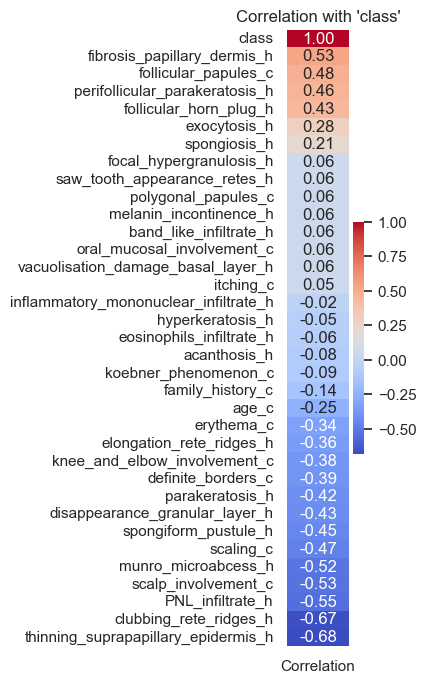

In [42]:
# Calculate the correlation between 'class' and all other attributes
correlation_matrix_class = df.corrwith(df['class'])
correlation_matrix_class.sort_values(ascending=False, inplace=True)  # Sort in descending order

# Convert the correlation matrix to a DataFrame
correlation_df = pd.DataFrame(correlation_matrix_class, columns=['Correlation'])

# Create a heatmap of the correlations
plt.figure(figsize=(1, 8))  # Set the figure size
sns.heatmap(correlation_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Correlation with 'class'")
plt.tight_layout()
plt.show()

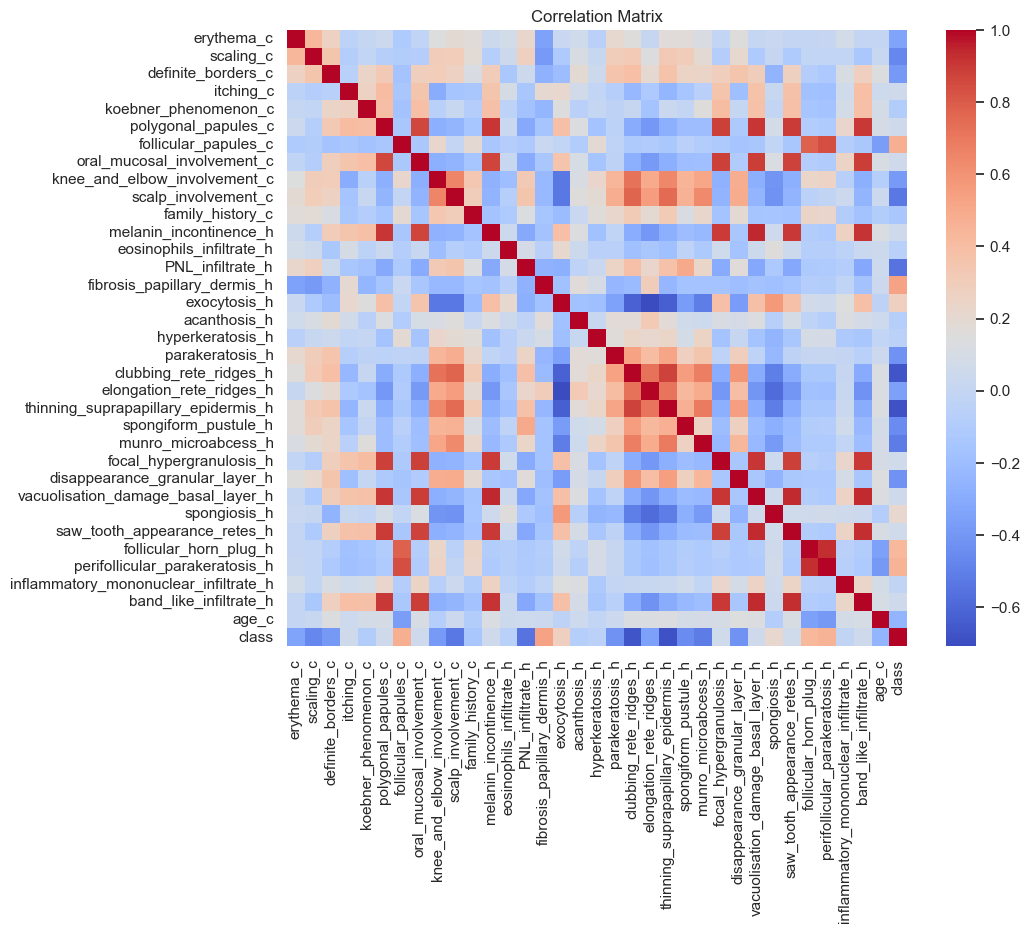

In [43]:
# Create correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

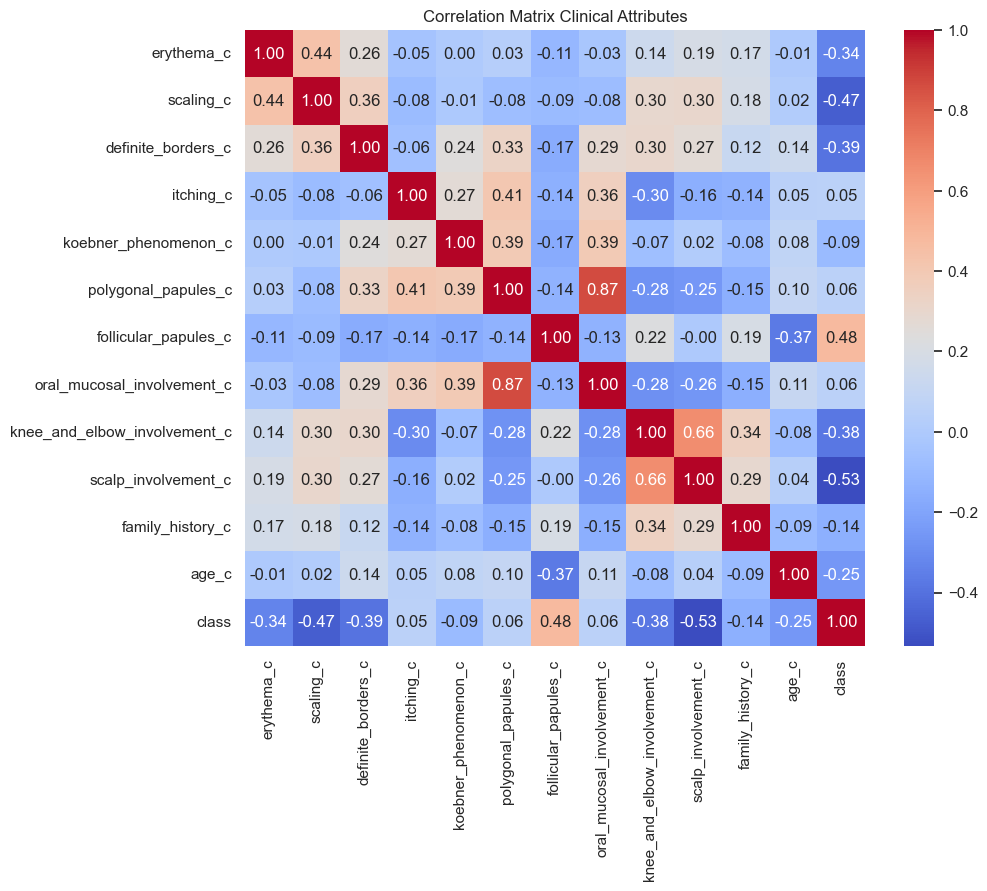

In [44]:
# Correlation matrix only clinical attributes
correlation_matrix_c = df_c.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix_c, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Clinical Attributes")
plt.show()

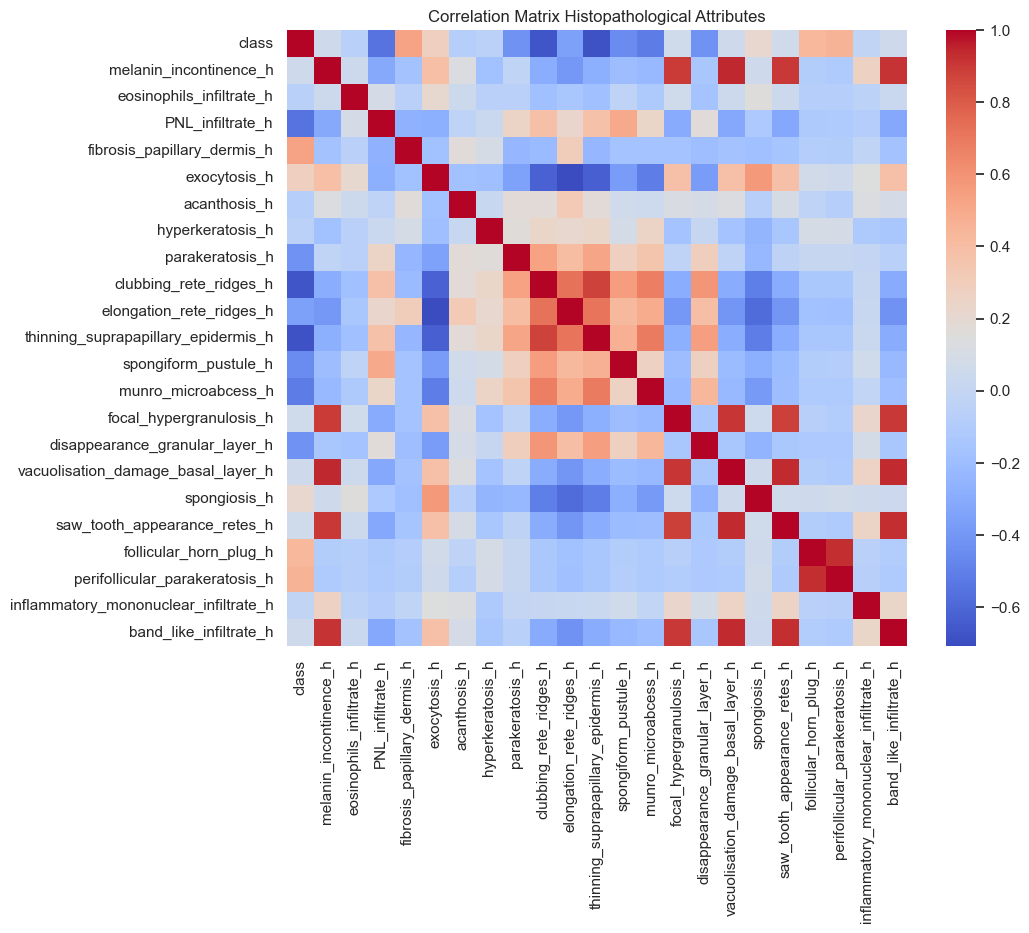

In [45]:
correlation_matrix_h = df_h.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix_h, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Histopathological Attributes")
plt.show()

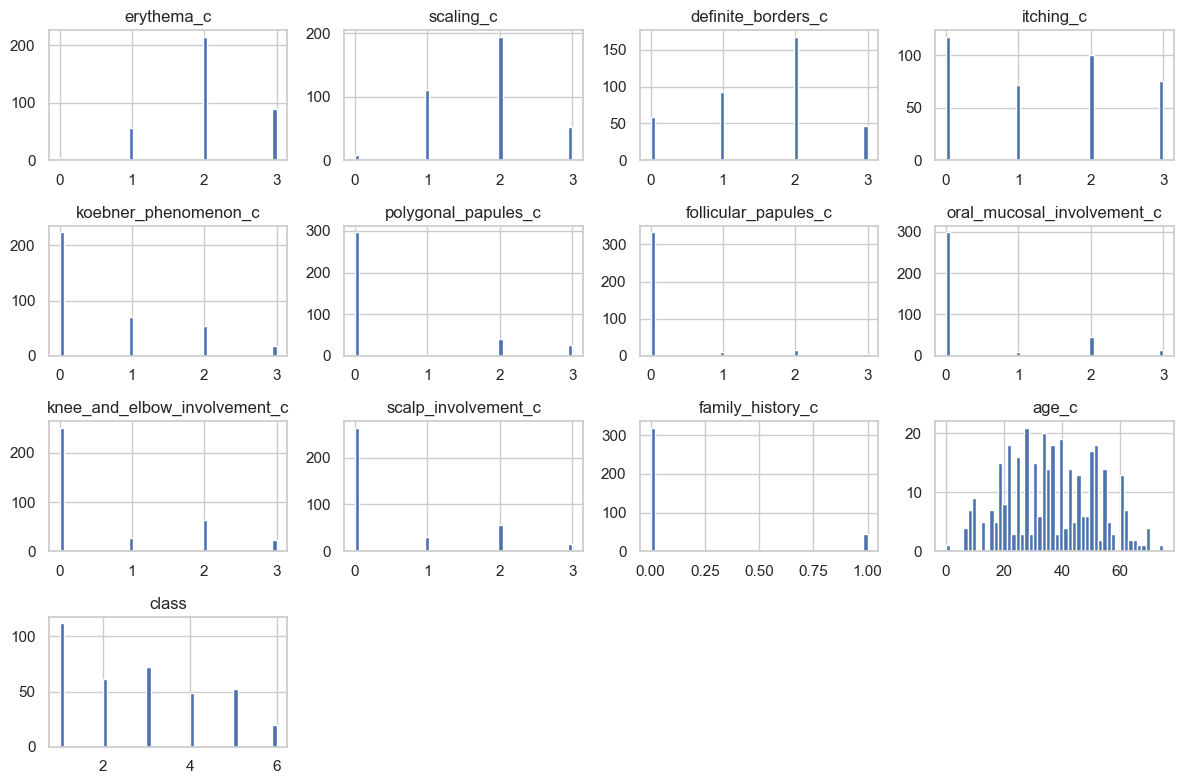

In [46]:
df_c.hist(bins=50 , figsize=(12,8))
plt.tight_layout()
plt.show()

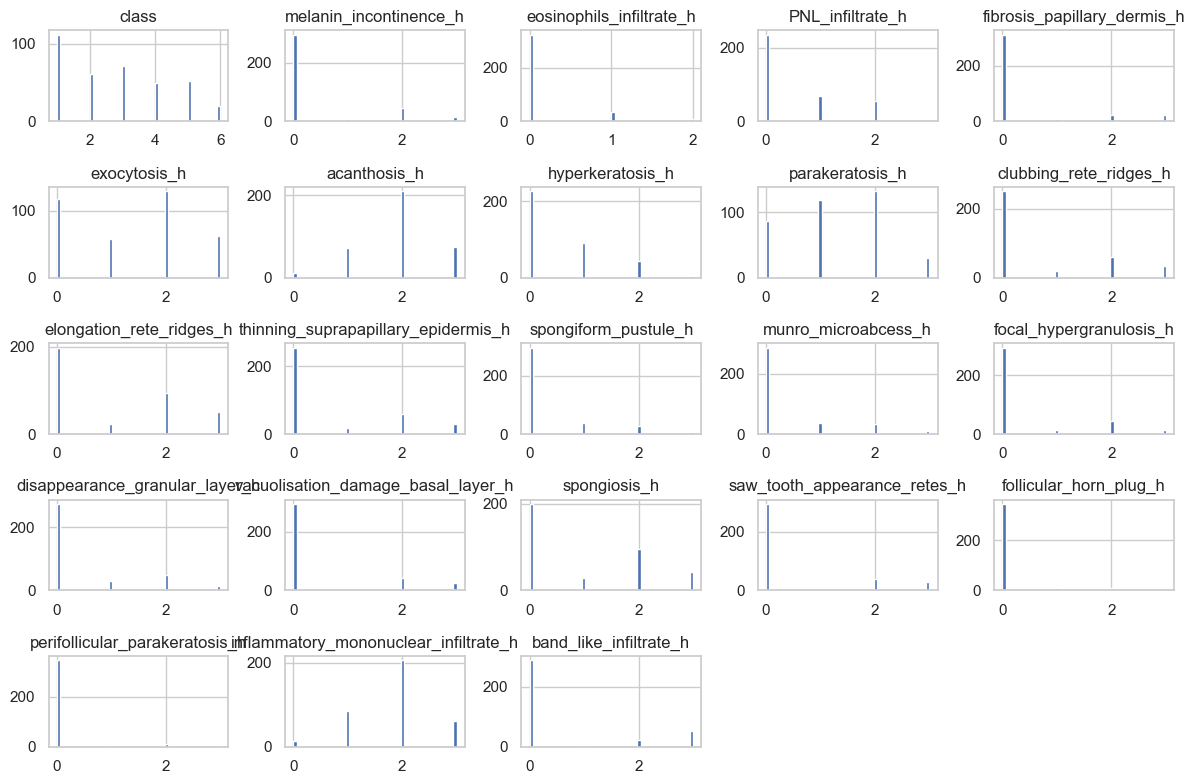

In [47]:
df_h.hist(bins=50 , figsize=(12,8))
plt.tight_layout()
plt.show()

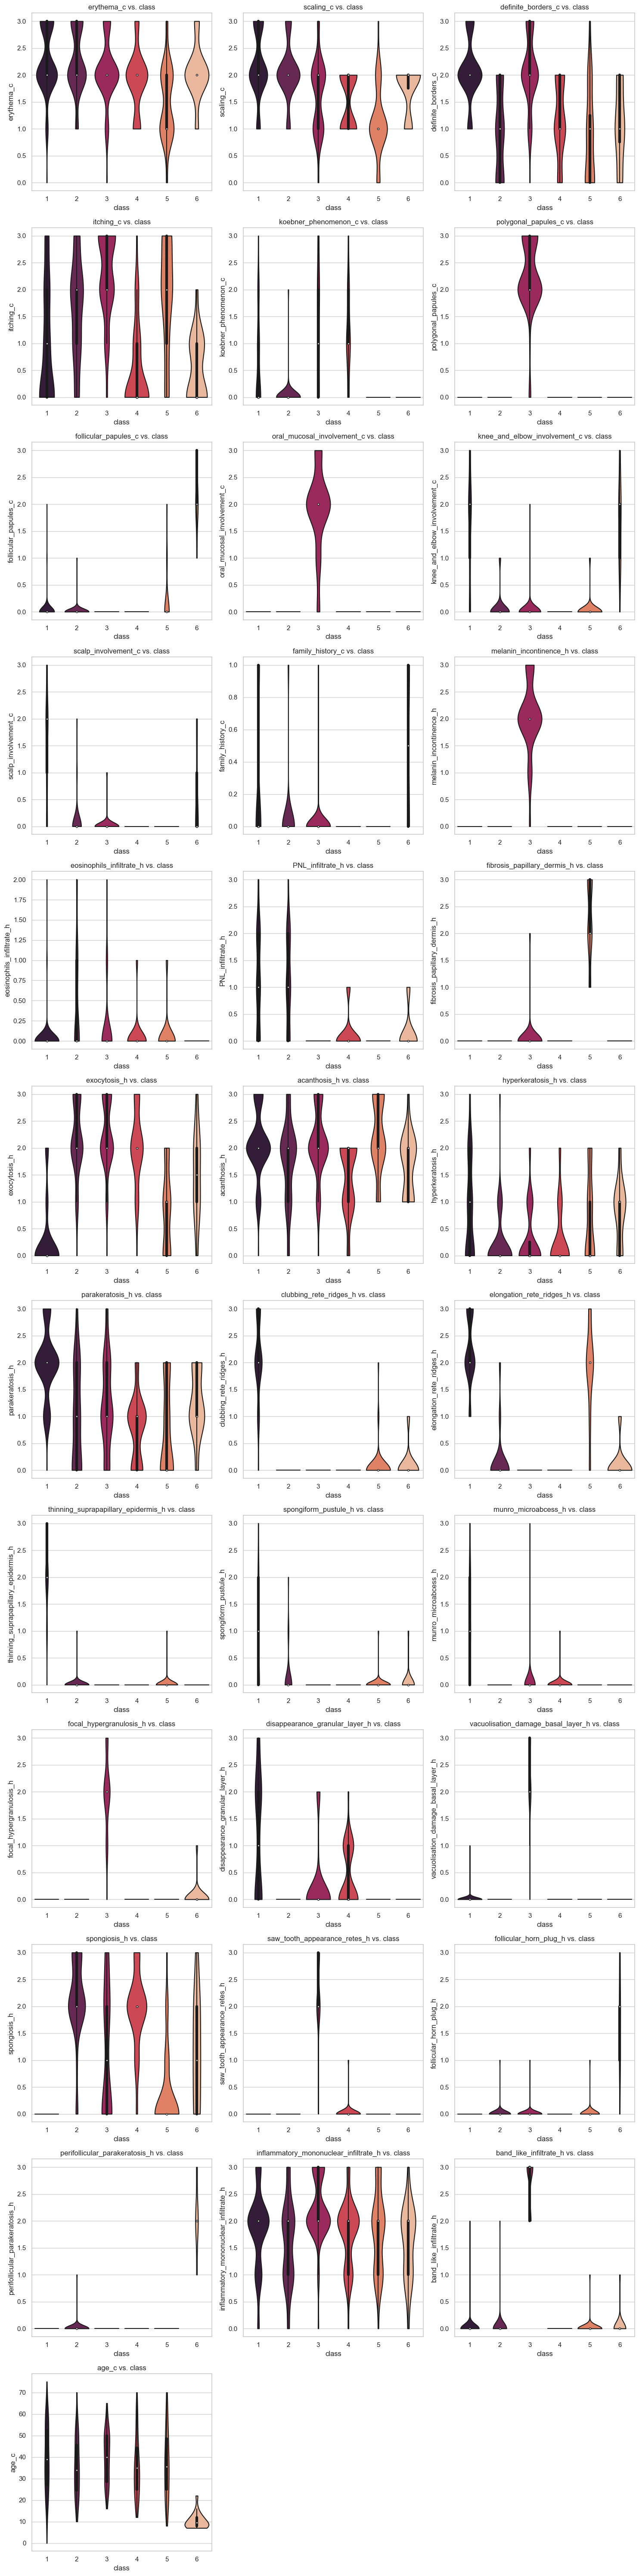

In [48]:


# Assuming 'df' is your DataFrame
num_features = len(df.columns) - 1  # Excluding 'DEATH_EVENT'
num_rows = (num_features + 2) // 3  # Calculate the number of rows needed for subplots

plt.figure(figsize=(15, 5 * num_rows))  # Set the figure size dynamically

for i, col in enumerate(df.columns):
    if col != 'class':
        plt.subplot(num_rows, 3, i + 1)  # Create subplots in a dynamic grid
        sns.violinplot(data=df, x="class", y=col, cut=0, palette="rocket")
        plt.title(f"{col} vs. class")

plt.tight_layout()
plt.show()

## 3) Classification Machine Learning with Many Models

### Set up Test Train Split

In [49]:
X = df.drop(["class"], axis=1)
y = df["class"]

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Assuming you have an Index object
attribute_index = df_c.columns

# Convert the Index object to a list of column names
attribute_list = attribute_index.tolist()

attribute_list.remove("class")

# Scenario 1: Model using only clinical attributes
X_train_c = X_train[attribute_list]  # Select clinical attributes
X_test_c = X_test[attribute_list]

X_c = X[attribute_list]

In [50]:
# Preprocessing steps for numerical data
num_transformer = make_pipeline(
                            SimpleImputer(strategy="mean"), 
                            StandardScaler())

num_features = make_column_selector(dtype_include="number")

# Put the pipelines together
preprocessor = make_column_transformer((num_transformer, num_features))

### Start Testing Models

In [51]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    MLPClassifier(),
    QuadraticDiscriminantAnalysis(),
    LinearSVC(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    SGDClassifier(),
]

### 3.1 Full Model

In [52]:
for classifier in classifiers:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="accuracy")
    
    grid.fit(X_train, y_train)
    
    print(f"Train score for {classifier} is {grid.best_score_}")
    print("")

Train score for LogisticRegression(max_iter=1000) is 0.9708417508417508

Train score for DecisionTreeClassifier() is 0.96

Train score for RandomForestClassifier() is 0.9781144781144782

Train score for SVC() is 0.9781144781144782

Train score for KNeighborsClassifier() is 0.9635016835016834

Train score for GaussianNB() is 0.8723232323232322

Train score for GradientBoostingClassifier() is 0.9708417508417508

Train score for AdaBoostClassifier() is 0.73010101010101



/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/o

Train score for MLPClassifier() is 0.9744781144781145

Train score for QuadraticDiscriminantAnalysis() is 0.8869360269360269

Train score for LinearSVC() is 0.9562962962962963

Train score for BaggingClassifier() is 0.9709090909090909



/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Train score for ExtraTreesClassifier() is 0.9853872053872055

Train score for SGDClassifier() is 0.9598653198653198



In [53]:
classifiers2 = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
]

In [54]:
for classifier in classifiers2:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="balanced_accuracy")
    
    grid.fit(X_train, y_train)
    
    print(f"Train score for {classifier} is {grid.best_score_}")
    #print(f"Best overall scores: {grid})
    print("")

Train score for DecisionTreeClassifier() is 0.9642195767195767

Train score for RandomForestClassifier() is 0.9738095238095239

Train score for GradientBoostingClassifier() is 0.9607263107263109

Train score for AdaBoostClassifier() is 0.62080486234898

Train score for BaggingClassifier() is 0.9646825396825397

Train score for ExtraTreesClassifier() is 0.9878306878306878



In [55]:
for classifier in classifiers2:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="f1_macro")
    
    grid.fit(X_train, y_train)
    
    print(f"Train score for {classifier} is {grid.best_score_}")
    #print(f"Best overall scores: {grid})
    print("")

Train score for DecisionTreeClassifier() is 0.954153753729425

Train score for RandomForestClassifier() is 0.97511717728436

Train score for GradientBoostingClassifier() is 0.962967536992305

Train score for AdaBoostClassifier() is 0.5659472080079044

Train score for BaggingClassifier() is 0.9595711784488875

Train score for ExtraTreesClassifier() is 0.9873154983990897



In [56]:
for classifier in classifiers2:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="f1_weighted")
    
    grid.fit(X_train, y_train)
    
    print(f"Train score for {classifier} is {grid.best_score_}")
    #print(f"Best overall scores: {grid})
    print("")

Train score for DecisionTreeClassifier() is 0.9667842081640708

Train score for RandomForestClassifier() is 0.9777463330434528

Train score for GradientBoostingClassifier() is 0.970321148789673

Train score for AdaBoostClassifier() is 0.6820044598522259

Train score for BaggingClassifier() is 0.9637337130525048

Train score for ExtraTreesClassifier() is 0.9850761780741142



In [57]:
for classifier in classifiers2:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="roc_auc_ovr_weighted")
    
    grid.fit(X_train, y_train)
    
    print(f"Train score for {classifier} is {grid.best_score_}")
    #print(f"Best overall scores: {grid})
    print("")

Train score for DecisionTreeClassifier() is 0.9761546197751054

Train score for RandomForestClassifier() is 0.9996426828673206

Train score for GradientBoostingClassifier() is 0.9993805625016805

Train score for AdaBoostClassifier() is 0.9075104620648695

Train score for BaggingClassifier() is 0.9948781291172596

Train score for ExtraTreesClassifier() is 0.9997579864669237



In [58]:
model1 = ExtraTreesClassifier()

pipe1 = make_pipeline(preprocessor, model1)

param_grid = {
    'extratreesclassifier__n_estimators': [50, 100, 200, 300],
    'extratreesclassifier__max_depth': [None, 10, 20, 30],
    'extratreesclassifier__min_samples_split': [2, 5, 10],
    'extratreesclassifier__min_samples_leaf': [1, 2, 4],
    'extratreesclassifier__bootstrap': [True, False],
    'extratreesclassifier__criterion': ['gini', 'entropy'],
    'extratreesclassifier__class_weight': [None, 'balanced']
}

In [59]:
grid1 = GridSearchCV(param_grid=param_grid, cv=5, estimator=pipe1, scoring="balanced_accuracy")

grid1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x28a007750>)])),
                                       ('extratreesclassifier',
                                        ExtraTreesClassifier())]),
             param_grid={'extratre...e, False],
                         'extratreesclassifier__class_weight': [None,
                                                                'balanced'],
                         'extratreesclassifier__criterion': ['gini', 'entropy'],
                         'extratreesclassifier__max_depth': [None, 10, 20, 30],
                         'extratreesclassifier__min_samples_leaf': [1, 2, 4],
                         'extratreesclassifier__min_samples_split': [2, 5, 10],
                         'extratreesclassifier__n_estimators': [50, 100, 200,
                                                                300]},
             scoring='balanced_accuracy')

In [60]:
print("Best score: ", grid1.best_score_)
print("Best params: ", grid1.best_params_)

Best score:  0.9952380952380953
Best params:  {'extratreesclassifier__bootstrap': False, 'extratreesclassifier__class_weight': 'balanced', 'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__max_depth': 20, 'extratreesclassifier__min_samples_leaf': 1, 'extratreesclassifier__min_samples_split': 10, 'extratreesclassifier__n_estimators': 50}


In [61]:
full_model = grid1.best_estimator_

In [62]:
dump(full_model, "full_model.joblib")

['full_model.joblib']

### 3.2 Simple Model

In [63]:
classifier_scores = []

for classifier in classifiers:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="balanced_accuracy")
    
    grid.fit(X_train_c, y_train)
    
    print(f"Train score for {classifier} is {grid.best_score_}")
    print("")
    best_estimator = grid.best_estimator_
    best_score = grid.best_score_
    classifier_scores.append((best_estimator, best_score))

Train score for LogisticRegression(max_iter=1000) is 0.8575458718841071

Train score for DecisionTreeClassifier() is 0.7569529326882267

Train score for RandomForestClassifier() is 0.8578104221486574

Train score for SVC() is 0.8595436154259684

Train score for KNeighborsClassifier() is 0.8132142503466031

Train score for GaussianNB() is 0.7001342203548087

Train score for GradientBoostingClassifier() is 0.8347614803497156

Train score for AdaBoostClassifier() is 0.3333333333333333



/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/o

Train score for MLPClassifier() is 0.8504691523073877

Train score for QuadraticDiscriminantAnalysis() is 0.3830263418498713

Train score for LinearSVC() is 0.8536106866989218

Train score for BaggingClassifier() is 0.8273330291712645

Train score for ExtraTreesClassifier() is 0.8475237317149082

Train score for SGDClassifier() is 0.8537663045015986



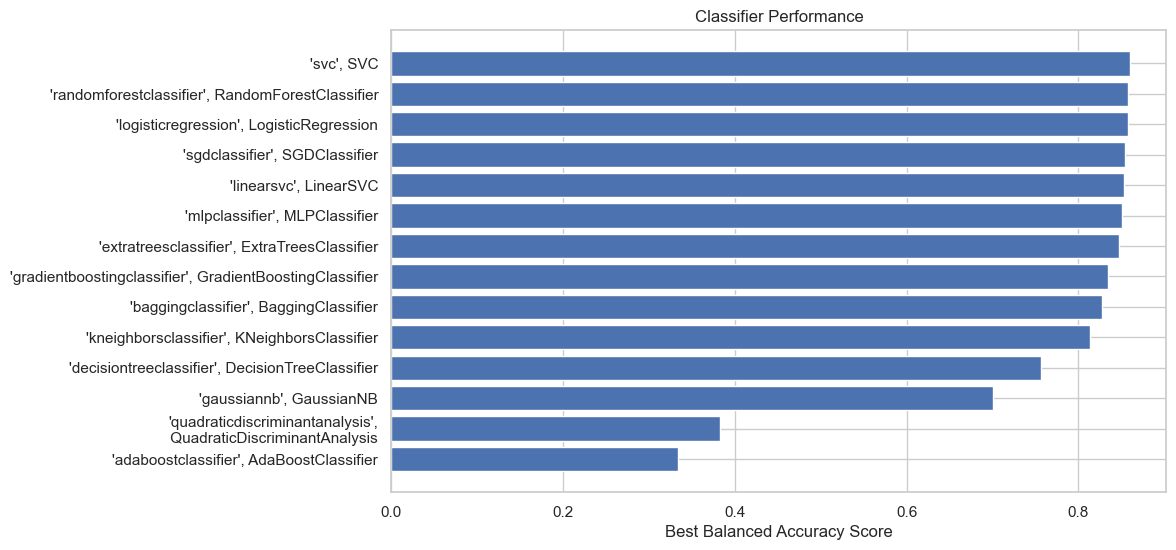

In [64]:
# Sort the list of classifier-score pairs by best scores in descending order
sorted_classifier_scores = sorted(classifier_scores, key=lambda x: x[1], reverse=True)

# Extract classifier names and scores for plotting
classifier_names = [str(classifier[0]).split('(')[10] for classifier in sorted_classifier_scores]
scores = [classifier[1] for classifier in sorted_classifier_scores]

# Plot the scores in a bar graph
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(classifier_names)), scores, tick_label=classifier_names)
plt.xlabel('Best Balanced Accuracy Score')
plt.title('Classifier Performance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest score at the top
plt.show()

In [65]:
classifier_scores = []

for classifier in classifiers:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="accuracy")
    
    grid.fit(X_train_c, y_train)
    
    print(f"Train score for {classifier} is {grid.best_score_}")
    print("")
    best_estimator = grid.best_estimator_
    best_score = grid.best_score_
    classifier_scores.append((best_estimator, best_score))

Train score for LogisticRegression(max_iter=1000) is 0.8649158249158247

Train score for DecisionTreeClassifier() is 0.8103703703703704

Train score for RandomForestClassifier() is 0.8614814814814814

Train score for SVC() is 0.8612794612794612

Train score for KNeighborsClassifier() is 0.8248484848484848

Train score for GaussianNB() is 0.6973737373737373

Train score for GradientBoostingClassifier() is 0.8466666666666667

Train score for AdaBoostClassifier() is 0.510976430976431



/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/o

Train score for MLPClassifier() is 0.8539393939393939

Train score for QuadraticDiscriminantAnalysis() is 0.4041077441077442

Train score for LinearSVC() is 0.8612121212121211

Train score for BaggingClassifier() is 0.8323232323232324

Train score for ExtraTreesClassifier() is 0.8614141414141414

Train score for SGDClassifier() is 0.8759595959595959



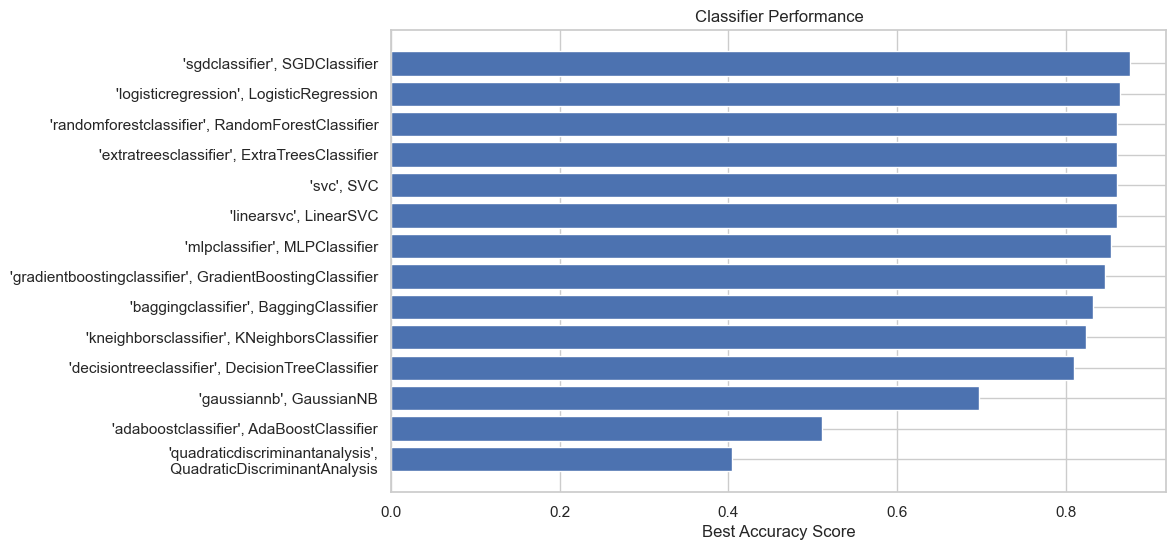

In [66]:
# Sort the list of classifier-score pairs by best scores in descending order
sorted_classifier_scores = sorted(classifier_scores, key=lambda x: x[1], reverse=True)

# Extract classifier names and scores for plotting
classifier_names = [str(classifier[0]).split('(')[10] for classifier in sorted_classifier_scores]
scores = [classifier[1] for classifier in sorted_classifier_scores]

# Plot the scores in a bar graph
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(classifier_names)), scores, tick_label=classifier_names)
plt.xlabel('Best Accuracy Score')
plt.title('Classifier Performance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest score at the top
plt.show()

In [67]:
for classifier in classifiers:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="accuracy")
    
    grid.fit(X_train_c, y_train)
    
    print(f"Train score for {classifier} is {grid.best_score_}")
    print("")

Train score for LogisticRegression(max_iter=1000) is 0.8649158249158247

Train score for DecisionTreeClassifier() is 0.8140740740740741

Train score for RandomForestClassifier() is 0.8614141414141414

Train score for SVC() is 0.8612794612794612

Train score for KNeighborsClassifier() is 0.8248484848484848

Train score for GaussianNB() is 0.6973737373737373

Train score for GradientBoostingClassifier() is 0.8465993265993266

Train score for AdaBoostClassifier() is 0.510976430976431



/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/o

Train score for MLPClassifier() is 0.8539393939393939

Train score for QuadraticDiscriminantAnalysis() is 0.4041077441077442

Train score for LinearSVC() is 0.8612121212121211

Train score for BaggingClassifier() is 0.8541414141414141

Train score for ExtraTreesClassifier() is 0.8577104377104376

Train score for SGDClassifier() is 0.8758922558922558



In [68]:
classifiers3 = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    SVC(),
    LinearSVC(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    SGDClassifier(),
]

In [69]:
for classifier in classifiers3:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="f1_weighted")
    
    grid.fit(X_train_c, y_train)
    
    print(f"Train score for {classifier} is {grid.best_score_}")
    print("")

Train score for LogisticRegression(max_iter=1000) is 0.8655665113362833

Train score for RandomForestClassifier() is 0.874099435926605

Train score for SVC() is 0.862356463615626

Train score for LinearSVC() is 0.8618290889480045

Train score for GradientBoostingClassifier() is 0.848279680435723

Train score for ExtraTreesClassifier() is 0.854428185606251

Train score for SGDClassifier() is 0.8506180972988366



In [70]:
param_grid_2 = {
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'gradientboostingclassifier__max_depth': [3, 5, 10],
    'gradientboostingclassifier__min_samples_split': [2, 5],
    'gradientboostingclassifier__min_samples_leaf': [1, 2],
    'gradientboostingclassifier__subsample': [0.8, 0.9, 1.0],
}

model2 = GradientBoostingClassifier()

pipe2 = make_pipeline(preprocessor, model2)

grid2 = GridSearchCV(param_grid=param_grid_2, cv=5, estimator=pipe2, scoring="balanced_accuracy")

grid2.fit(X_train_c, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x28a007750>)])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             param_gri...tboostingclassifier__learning_rate': [0.01,
                                                                       0.1, 0.2,
                                                                       0.3],
                         'gradientboostingclassifier__max_depth': [3, 5, 10],
                         'gradientboostingclassifier__min_samples_leaf': [1, 2],
                         'gradientboostingclassifier__min_samples_split': [2,
                                                                           5],
                         'gradientboostingclassifier__n_estimators': [50, 100,
                                                                      200],
                         'gradientboostingclassifier__subsample': [0.8, 0.9,
                                                                   1.0]},
             scoring='balanced_accuracy')

In [71]:
print("Best score: ", grid2.best_score_)
print("Best params: ", grid2.best_params_)

Best score:  0.8479559247941599
Best params:  {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 50, 'gradientboostingclassifier__subsample': 0.8}


In [72]:
param_grid_3 = {
    'linearsvc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],  # Adjust the values as needed
    'linearsvc__max_iter': [1000, 2000, 3000, 10000]
}

model3 = LinearSVC()

pipe3 = make_pipeline(preprocessor, model3)

grid3 = GridSearchCV(param_grid=param_grid_3, cv=5, estimator=pipe3, scoring="balanced_accuracy")

grid3.fit(X_train_c, y_train)

/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarlidheim/anaconda3/lib/python3.11/site-packages/s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x28a007750>)])),
                                       ('linearsvc', LinearSVC())]),
             param_grid={'linearsvc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'linearsvc__max_iter': [1000, 2000, 3000, 10000]},
             scoring='balanced_accuracy')

In [73]:
print("Best score: ", grid3.best_score_)
print("Best params: ", grid3.best_params_)

Best score:  0.8536106866989218
Best params:  {'linearsvc__C': 1, 'linearsvc__max_iter': 1000}


In [74]:
simple_model = grid3.best_estimator_
dump(simple_model, "simple_model.joblib")

['simple_model.joblib']

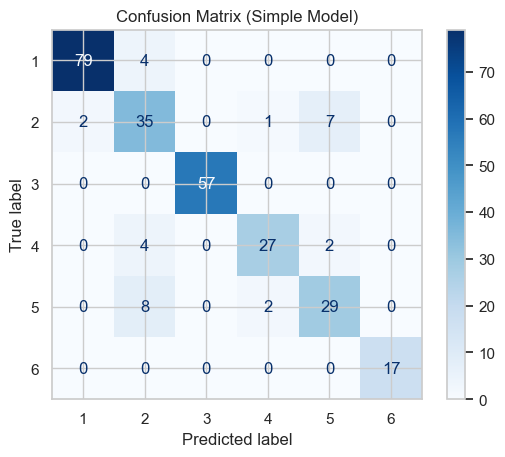

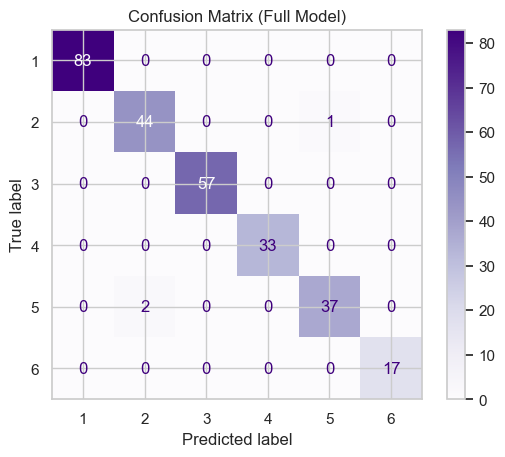

In [75]:
# Evaluate the simple model on the training data
simple_model = grid3.best_estimator_

# Predict the labels for the training data
y_pred_simple = simple_model.predict(X_train_c)

# Calculate the confusion matrix
cm_simple = confusion_matrix(y_train, y_pred_simple)

# Display the confusion matrix
disp_simple = ConfusionMatrixDisplay(confusion_matrix=cm_simple, display_labels=simple_model.classes_)
disp_simple.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Simple Model)')
plt.show()

# Evaluate the full model on the training data
full_model = grid2.best_estimator_

# Predict the labels for the training data
y_pred_full = full_model.predict(X_train_c)

# Calculate the confusion matrix
cm_full = confusion_matrix(y_train, y_pred_full)

# Display the confusion matrix
disp_full = ConfusionMatrixDisplay(confusion_matrix=cm_full, display_labels=full_model.classes_)
disp_full.plot(cmap='Purples', values_format='d')
plt.title('Confusion Matrix (Full Model)')
plt.show()

## 4) Final Evaluation - Testing Final Models on Test Data

### 4.1 Test of Full Model

In [76]:
full_model = load("full_model1.joblib")

In [77]:
y_pred = full_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average="weighted")

# Calculate AUC-ROC score
y_pred_prob = full_model.predict_proba(X_test)  # Get the predicted probabilities for class 1
auc_roc = roc_auc_score(y_test, y_pred_prob, average="weighted", multi_class="ovr")

print(f"The model score on test data are:\n Accuracy: {acc}, Precision: {pre}, Recall: {rec}, F1 Score: {f1}, AUC-ROC Score: {auc_roc}")

The model score on test data are:
 Accuracy: 0.9782608695652174, Precision: 0.9806763285024155, Recall: 0.9782608695652174, F1 Score: 0.9781756180733163, AUC-ROC Score: 1.0


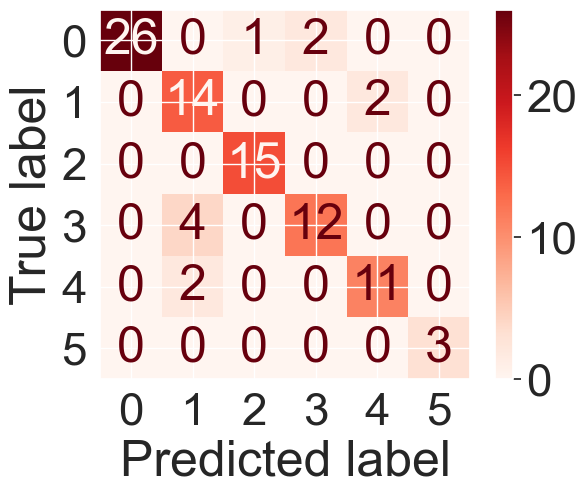

Received model choice: Simple Model (Visual Inspection)
Received input features: (2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 52, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
before standard scaler   erythema_c  scaling_c  definite_borders_c  itching_c  koebner_phenomenon_c  \
0           2          1                   0          2                     0   

   polygonal_papules_c  follicular_papules_c  oral_mucosal_involvement_c  \
0                    0                     0                           0   

   knee_and_elbow_involvement_c  scalp_involvement_c  family_history_c  age_c  
0                             0                    0                 0     52  
Predicted class: 5
Received model choice: Full Model (Skin Sample)
Received input features: (2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 52, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0)
before standard scaler   erythema_c  scaling_c  definite_borders_c  itching_c  koebner_phenomenon_c  \
0           2     

In [106]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds',values_format='d')

plt.show()

In [79]:
#Best params:  {'extratreesclassifier__bootstrap': True, 'extratreesclassifier__class_weight': None, 'extratreesclassifier__criterion': 'entropy', 'extratreesclassifier__max_depth': None, 'extratreesclassifier__min_samples_leaf': 2, 'extratreesclassifier__min_samples_split': 5, 'extratreesclassifier__n_estimators': 100}

In [80]:
y_pred = grid1.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average="weighted")

# Calculate AUC-ROC score
y_pred_prob = grid1.predict_proba(X_test)  # Get the predicted probabilities for class 1
auc_roc = roc_auc_score(y_test, y_pred_prob, average="weighted", multi_class="ovr")

print(f"The model score on test data are:\n Accuracy: {acc}, Precision: {pre}, Recall: {rec}, F1 Score: {f1}, AUC-ROC Score: {auc_roc}")

The model score on test data are:
 Accuracy: 0.9782608695652174, Precision: 0.9782608695652174, Recall: 0.9782608695652174, F1 Score: 0.9782608695652174, AUC-ROC Score: 0.9984267734553776


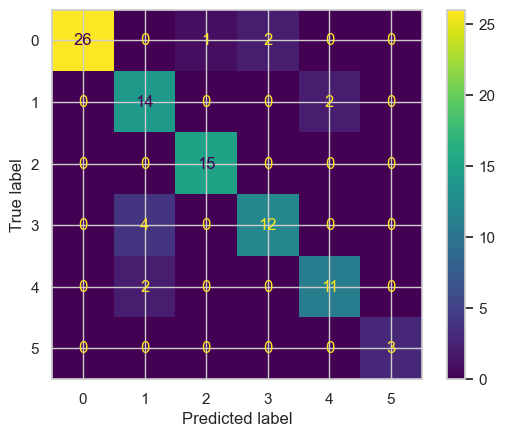

In [100]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [83]:
# Train data on full set
model_full_extree_all_data = make_pipeline(preprocessor, LinearSVC(C=1, max_iter=1000))
model_full_extree_all_data.fit(X, y)
dump(model_full_extree_all_data, "model_full_extree_all_data.joblib")

['model_full_extree_all_data.joblib']

In [84]:
best_params = {
    'bootstrap': True,
    'class_weight': None,
    'criterion': 'entropy',
    'max_depth': None,
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 100
}

model_full_extree_all_data = make_pipeline(preprocessor, ExtraTreesClassifier(**best_params))
model_full_extree_all_data.fit(X, y)
dump(model_full_extree_all_data, "model_full_extree_all_data.joblib")

['model_full_extree_all_data.joblib']

### 4.2 Test on Simple Model

In [85]:
simple_model = load("simple_model1.joblib")

In [86]:
y_pred = grid2.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average="weighted")

# Calculate AUC-ROC score
y_pred_prob = grid2.predict_proba(X_test)  # Get the predicted probabilities for class 1
auc_roc = roc_auc_score(y_test, y_pred_prob, average="weighted", multi_class="ovr")

print(f"The model score on test data are:\n Accuracy: {acc}, Precision: {pre}, Recall: {rec}, F1 Score: {f1}, AUC-ROC Score: {auc_roc}")

The model score on test data are:
 Accuracy: 0.9130434782608695, Precision: 0.9224528713087065, Recall: 0.9130434782608695, F1 Score: 0.915492937793078, AUC-ROC Score: 0.9848334662100122


In [96]:
y_pred = grid3.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average="weighted")

# Calculate AUC-ROC score
#y_pred_prob = grid3.predict_proba(X_test)  # Get the predicted probabilities for class 1
#auc_roc = roc_auc_score(y_test, y_pred_prob, average="weighted", multi_class="ovr")

print(f"The model score on test data are:\n Accuracy: {acc}, Precision: {pre}, Recall: {rec}, F1 Score: {f1}")

The model score on test data are:
 Accuracy: 0.8804347826086957, Precision: 0.8910520186335403, Recall: 0.8804347826086957, F1 Score: 0.8823777749443948


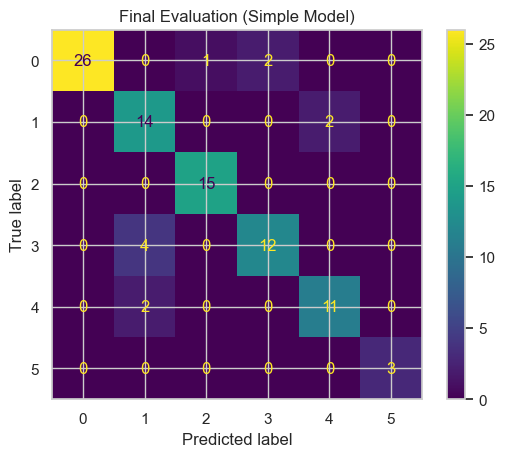

In [99]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('Final Evaluation (Simple Model)')
plt.show()

In [88]:
grid3.best_params_

{'linearsvc__C': 1, 'linearsvc__max_iter': 1000}

In [89]:
model_simple_SVC_all_data = make_pipeline(preprocessor, LinearSVC(C=1, max_iter=1000))
model_simple_SVC_all_data.fit(X_c, y)
dump(model_simple_SVC_all_data, "model_simple_SVC_all_data.joblib")

['model_simple_SVC_all_data.joblib']

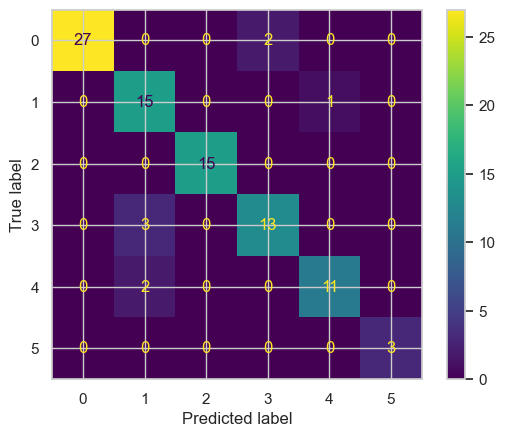

In [90]:
y_pred = simple_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

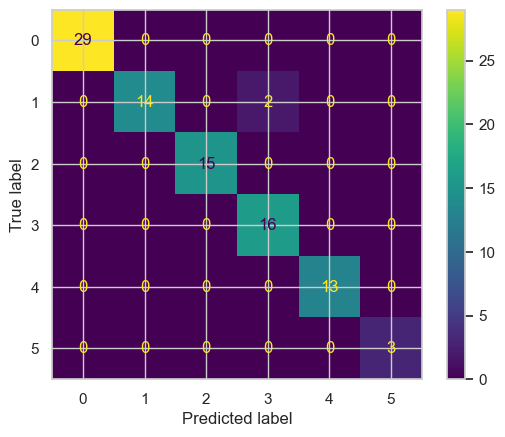

In [91]:
y_pred = full_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

# 5) Gradio App

In [92]:
clinical_columns = [
    'erythema_c', 'scaling_c', 'definite_borders_c', 'itching_c', 'koebner_phenomenon_c',
    'polygonal_papules_c', 'follicular_papules_c', 'oral_mucosal_involvement_c',
    'knee_and_elbow_involvement_c', 'scalp_involvement_c', 'family_history_c', 'age_c', 'class_c'
]

# List of column names for histopathological attributes
histopathological_columns = [
    'class_h',
    'melanin_incontinence_h', 'eosinophils_infiltrate_h', 'PNL_infiltrate_h',
    'fibrosis_papillary_dermis_h', 'exocytosis_h', 'acanthosis_h', 'hyperkeratosis_h',
    'parakeratosis_h', 'clubbing_rete_ridges_h', 'elongation_rete_ridges_h',
    'thinning_suprapapillary_epidermis_h', 'spongiform_pustule_h', 'munro_microabcess_h',
    'focal_hypergranulosis_h', 'disappearance_granular_layer_h',
    'vacuolisation_damage_basal_layer_h', 'spongiosis_h', 'saw_tooth_appearance_retes_h',
    'follicular_horn_plug_h', 'perifollicular_parakeratosis_h',
    'inflammatory_mononuclear_infiltrate_h', 'band_like_infiltrate_h'
]

custom_labels = [
    "Psoriasis",
    "Seborrheic Dermatitis",
    "Lichen Planus",
    "Pityriasis Rosea",
    "Chronic Dermatitis",
    "Pityriasis Rubra Pilaris"
]

clinical_descriptions = [
    "Redness and inflammation of the skin",
    "Excessive skin flaking or peeling",
    "Distinct and clear borders of affected areas",
    "Itching or irritation of the skin",
    "Appearance of skin lesions with rubbing or scratching",
    "Presence of polygonal-shaped skin papules",
    "Presence of follicular skin papules",
    "Involvement of oral mucosal tissues",
    "Involvement of knees and elbows",
    "Scalp involvement",
    "Family history of skin disease",
    "Patient's age (in years)"
]

# Short descriptions for histopathological attributes
histopathological_descriptions = [
    "Loss of melanin in the skin",
    "Infiltration of eosinophils in skin tissue",
    "Infiltration of polymorphonuclear leukocytes (PNL) in skin tissue",
    "Fibrosis in the papillary dermis of the skin",
    "Exocytosis of skin cells",
    "Acanthosis or thickening of the epidermis",
    "Hyperkeratosis or thickening of the stratum corneum",
    "Parakeratosis or retention of nuclei in stratum corneum",
    "Clubbing of rete ridges (skin layer)",
    "Elongation of rete ridges",
    "Thinning of suprapapillary epidermis",
    "Presence of spongiform pustules in skin",
    "Presence of Munro microabscesses in skin",
    "Presence of focal hypergranulosis in skin",
    "Disappearance of the granular layer in skin",
    "Vacuolization and damage to the basal layer of skin",
    "Spongiosis or accumulation of fluid in the epidermis",
    "Saw-tooth appearance of rete ridges",
    "Presence of follicular horn plugs",
    "Perifollicular parakeratosis",
    "Inflammatory mononuclear infiltrate in skin",
    "Band-like infiltrate in the dermal-epidermal junction"
]


In [107]:
# Load your simple and full models from the joblib files
simple_model = joblib.load("model_simple_SVC_all_data1.joblib")
full_model = joblib.load("model_full_extree_all_data1.joblib")

# Define Gradio components and models
input_components = []

# Define the model selection component using Gradio's newer component system
model_choice = gr.components.Radio(choices=["Simple Model (Visual Inspection)", "Full Model (Skin Sample)"], label="Select Model")

# Add input components for clinical attributes with descriptions
clinical_input_components = []

for i, column in enumerate(clinical_columns[:-1]):  # Exclude the 'class' column
    label = f"{column}: {clinical_descriptions[i]}"  # Combine label and description
    if column == 'age_c':
        clinical_input_components.append(gr.inputs.Slider(minimum=0, maximum=100, step=1, label=label))
    else:
        clinical_input_components.append(gr.inputs.Slider(minimum=0, maximum=3, step=1, label=label))

# Add input components for histopathological attributes with descriptions
histopathological_input_components = []

for i, column in enumerate(histopathological_columns[1:]):  # Exclude the 'class' column
    label = f"{column}: {histopathological_descriptions[i]}"  # Combine label and description
    histopathological_input_components.append(gr.inputs.Slider(minimum=0, maximum=3, step=1, label=label))

def predict_skin_disease(model_choice, *input_features):
    print("Received model choice:", model_choice)
    print("Received input features:", input_features)

    input_features = list(input_features)
    num_clinical_features = len(clinical_columns) - 1
    num_histopathological_features = len(histopathological_columns) - 1

    if model_choice == "Simple Model (Visual Inspection)":
        # Use only the first 12 clinical attributes for the simple model
        input_features = input_features[:num_clinical_features]
        input_df = pd.DataFrame([input_features], columns=clinical_columns[:-1])
        print(f"before standard scaler{input_df}")
        prediction = simple_model.predict(input_df)[0]
    else:
        # Use all clinical and histopathological attributes for the full model
        input_features = input_features[:num_clinical_features + num_histopathological_features]
        input_df = pd.DataFrame([input_features], columns=clinical_columns[:-1] + histopathological_columns[1:])
        print(f"before standard scaler{input_df}")
        input_df = input_df[[col for col in input_df.columns if col != 'age_c'] + ['age_c']]
        probabilities = full_model.predict_proba(input_df)
        prediction = full_model.predict(input_df)[0]

        # Create a bar plot showing the probabilities for each disease using Seaborn
        plt.figure(figsize=(10, 5))
        sns.set(font_scale=1.5)
        sns.barplot(x=custom_labels, y=probabilities.flatten(), palette="viridis")
        plt.xlabel('Disease')
        plt.ylabel('Probability')
        plt.title('Model Probability of each Disease')
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        # Save the plot as an image
        plt.savefig(fname="prob.png", format="png")
        # Convert the image buffer to bytes

    print("Predicted class:", prediction)
    
    pred_disease = custom_labels[prediction - 1]
    # Send the question to chat GPT in order to get a reponse back
    response = openai.ChatCompletion.create(
    # What model to use
    model="gpt-3.5-turbo",
    # The full message including the role of the chat assistant and the first message
    messages=[
        {"role": "system", "content": "You are a doctor specializing in skin diseases (dermatologist)."},
        {"role": "user", "content": f"You are dermatologist giving advice on the skin disease {pred_disease}. Please answer with a short description of the disease, how to treat it and how it usually changes throughout your life. Answer should be between 10-15 sentences."}
    ],
    # Max token to set price caps
    max_tokens=3000,
    # Temperature set, indicates how random the model should be in picking a word (0 is not randomness and 1 is wild)
    temperature=0.1
    )

    advice = response["choices"][0]["message"]["content"]
    #return advice
    
    if model_choice == "Simple Model (Visual Inspection)":
        image = "skind.jpeg"
    else:
        image = "prob.png"

    return advice, image

# Create Gradio interface
gr.Interface(
    fn=predict_skin_disease,
    inputs=[model_choice] + clinical_input_components + histopathological_input_components,
    outputs=["text", gr.outputs.Image(type="pil", label="Model Probability of each Disease")],
    title="Eryhemato-Squamous Disease (ESD) - Skin Disease Prediction",
    description="The model can predict Psoriasis, Seborrheic Dermatitis, Lichen Planus, Pityriasis Rosea, Chronic Dermatitis, and Pityriasis Rubra Pilaris based on visual inspection (Simple Model) or histopathological attributes attained with a skin sample (Full Model). Input on a scale of 0-3, with 0 being not present and 3 being high and 1-2 relative intermediate values. The model will output your disease dignosis together wtih a summary of the disease, typical treatments and how it usually evolves throughout your life (OpenAI GPT-4)",
    theme = gr.themes.Base(
    primary_hue="yellow",
    secondary_hue="orange",
)
).launch(share=True)

/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_16063/4086775770.py:19: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  clinical_input_components.append(gr.inputs.Slider(minimum=0, maximum=3, step=1, label=label))
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_16063/4086775770.py:19: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  clinical_input_components.append(gr.inputs.Slider(minimum=0, maximum=3, step=1, label=label))
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_16063/4086775770.py:17: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  clinical_input_components.append(gr.inputs.Slider(minimum=0, maximum=100, step=1, label=label))
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_16063

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://2b2fa605c3e8075b04.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Received model choice: Simple Model (Visual Inspection)
Received input features: (2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 48, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
before standard scaler   erythema_c  scaling_c  definite_borders_c  itching_c  koebner_phenomenon_c  \
0           2          1                   2          0                     2   

   polygonal_papules_c  follicular_papules_c  oral_mucosal_involvement_c  \
0                    0                     0                           0   

   knee_and_elbow_involvement_c  scalp_involvement_c  family_history_c  age_c  
0                             0                    0                 0     48  
Predicted class: 4
Received model choice: Full Model (Skin Sample)
Received input features: (2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 48, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0)
before standard scaler   erythema_c  scaling_c  definite_borders_c  itching_c  koebner_phenomenon_c  \
0           2     

In [94]:
# Check the type of the loaded model
print(type(full_model))

# Optional: Print a summary of the model (if it supports it)
if hasattr(full_model, 'summary'):
    print(full_model.summary())

<class 'sklearn.pipeline.Pipeline'>
